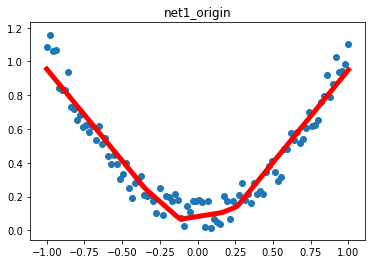

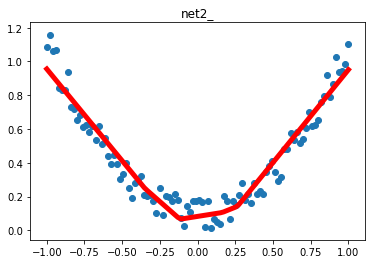

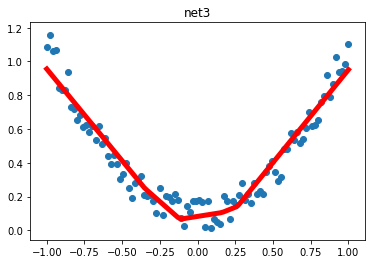

In [1]:
'''
对训练后的网络进行保存和提取
'''
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt


torch.manual_seed(1)    # reproducible
# 假数据
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)
x, y = Variable(x, requires_grad=False), Variable(y, requires_grad=False)


def save():
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1,10),
        torch.nn.ReLU(),
        torch.nn.Linear(10,1)
    )
    optimizer = torch.optim.SGD(net1.parameters(),lr=0.5)
    loss_func = torch.nn.MSELoss()
    for eoch in range(100):
        prediction = net1(x)
        loss = loss_func(prediction,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    torch.save(net1, 'net.pkl')  # 保存整个网络
    torch.save(net1.state_dict(), 'net_params.pkl')  # 只保存网络中的参数 (速度快, 占内存少)
    return prediction

# 提取网络

def getWholeNet():
    net2 = torch.load('net.pkl')
    return net2(x)


def getNetByParams():
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1,10),
        torch.nn.ReLU(),
        torch.nn.Linear(10,1)
    )
    net3.load_state_dict(torch.load('net_params.pkl'))
    return net3(x)

# 可视化

def show(title,predicition):
    plt.cla()
    plt.scatter(x.data.numpy(),y.data.numpy())
    plt.plot(x.data.numpy(),predicition.data.numpy(),'r-',lw=5)
    plt.title(title)
    plt.show()

pre = save()
show("net1_origin",pre)
net2 = getWholeNet()
net3 = getNetByParams()

show("net2",net2)
show("net3",net3)




In [2]:
import torch
import torch.utils.data as Data
from torch.autograd import Variable
torch.manual_seed(1)    # reproducible

BATCH_SIZE = 5      # 批训练的数据个数

# x = torch.linspace(1, 10, 10)       # x data (torch tensor)
# y = torch.linspace(10, 1, 10)       # y data (torch tensor)

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())

# 先转换成 torch 能识别的 Dataset
torch_dataset = Data.TensorDataset(data_tensor=x, target_tensor=y)

# 把 dataset 放入 DataLoader
loader = Data.DataLoader(
    dataset=torch_dataset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # 要不要打乱数据 (打乱比较好)
    num_workers=2,              # 多线程来读数据
)
loss_fun = torch.nn.MSELoss()

net = torch.nn.Sequential(
    torch.nn.Linear(1,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,1)
)
optimizer = torch.optim.SGD(net.parameters(),lr=0.5)
for epoch in range(3):   # 训练所有!整套!数据 3 次
    for step, (batch_x,batch_y) in enumerate(loader):  # 每一步 loader 释放一小批数据用来学习
        # 假设这里就是你训练的地方...
        prediction = net(Variable(batch_x))
        optimizer.zero_grad()
        loss = loss_fun(prediction,Variable(batch_y))
        loss.backward()
        optimizer.step()
        # 打出来一些数据
        print('Epoch: ', epoch, '| Step: ', step, '| batch x: ',
              batch_x.numpy(), '| batch y: ', batch_y.numpy())

Epoch:  0 | Step:  0 | batch x:  [[-0.87878788]
 [-0.01010102]
 [ 0.5151515 ]
 [ 0.59595954]
 [-1.        ]] | batch y:  [[ 0.83273464]
 [ 0.17310609]
 [ 0.34788883]
 [ 0.47997379]
 [ 1.08340442]]
Epoch:  0 | Step:  1 | batch x:  [[-0.9191919 ]
 [-0.57575756]
 [-0.37373739]
 [-0.95959598]
 [-0.5959596 ]] | batch y:  [[ 0.84493661]
 [ 0.39415148]
 [ 0.32247204]
 [ 1.06488943]
 [ 0.43900675]]
Epoch:  0 | Step:  2 | batch x:  [[ 0.55555558]
 [-0.09090906]
 [ 0.75757575]
 [ 0.23232329]
 [ 0.67676771]] | batch y:  [[ 0.31547627]
 [ 0.02682462]
 [ 0.61834592]
 [ 0.17258722]
 [ 0.51771355]]
Epoch:  0 | Step:  3 | batch x:  [[-0.13131315]
 [-0.39393938]
 [ 0.41414142]
 [-0.33333331]
 [-0.07070708]] | batch y:  [[ 0.17779465]
 [ 0.28928173]
 [ 0.23461625]
 [ 0.20255207]
 [ 0.14346401]]
Epoch:  0 | Step:  4 | batch x:  [[-0.97979796]
 [-0.67676771]
 [ 0.35353529]
 [ 0.91919196]
 [-0.030303  ]] | batch y:  [[ 1.15944099]
 [ 0.537368  ]
 [ 0.16449739]
 [ 1.02558792]
 [ 0.1761961 ]]
Epoch:  0 | Ste